In [1]:
from nba_api.stats.endpoints import leaguedashplayerstats
import pandas as pd
import matplotlib.pyplot as plt

print("Imported succesfully")

Imported succesfully


In [2]:
player_stats  = leaguedashplayerstats.LeagueDashPlayerStats(
    season = '2024-25',
    per_mode_detailed = 'PerGame'
)

players_df = player_stats.get_data_frames()[0]

# filter to players with sig mins
players_df = players_df[players_df['MIN'] > 20]

print(f"Total players(20+ MPG): {len(players_df)}")
print("\nColumns available:")
print(players_df.columns.tolist())

Total players(20+ MPG): 269

Columns available:
['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK', 'TEAM_COUNT']


In [ ]:
# simple efficiency: (pts + reb + ast + stl + blk - tov) / gp
players_df['SIMPLE_EFF'] = (
    players_df['PTS'] +
    players_df['REB'] + 
    players_df['AST'] + 
    players_df['STL'] +
    players_df['BLK'] -
    players_df['TOV']
)

# sort by efficiency
top_efficient = players_df.nlargest(20, 'SIMPLE_EFF')

print("Top 20 Most Efficient Players:")
print(top_efficient[['PLAYER_NAME', 'SIMPLE_EFF', 'PTS', 'REB',
                     'AST']].to_string(index = False))

Top 20 Most Efficient Players:
            PLAYER_NAME  SIMPLE_EFF  PTS  REB  AST
           Nikola Jokić        51.6 29.6 12.7 10.2
  Giannis Antetokounmpo        47.8 30.4 11.9  6.5
Shai Gilgeous-Alexander        44.4 32.7  5.0  6.4
            Luka Dončić        42.7 28.2  8.2  7.7
          Anthony Davis        41.0 24.7 11.6  3.5
      Victor Wembanyama        40.7 24.3 11.0  3.7
           Jayson Tatum        40.2 26.8  8.7  6.0
     Karl-Anthony Towns        39.3 24.4 12.8  3.1
        Cade Cunningham        38.7 26.1  6.1  9.1
           LeBron James        38.3 24.4  7.8  8.2
       Domantas Sabonis        37.2 19.1 13.9  6.0
         Paolo Banchero        36.6 25.9  7.5  4.8
        Anthony Edwards        36.4 27.6  5.7  4.5
        Zion Williamson        36.2 24.6  7.2  5.3
           Kevin Durant        35.7 26.6  6.0  4.2
             Trae Young        35.6 24.2  3.1 11.6
           Tyrese Maxey        35.5 26.3  3.3  6.1
         Damian Lillard        35.3 24.9  4.7  7.1


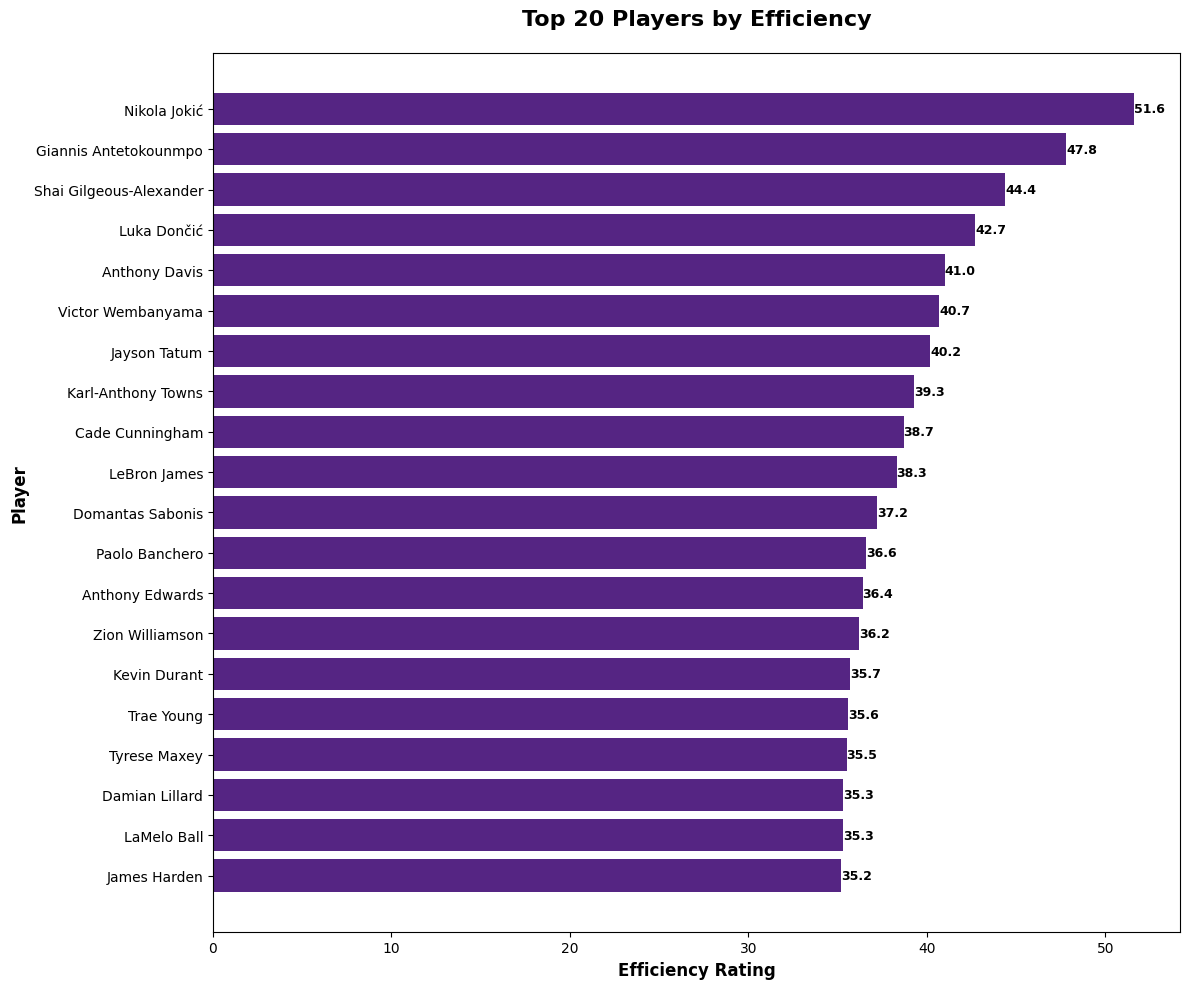

In [13]:
# top 20 visual
top_20 = players_df.nlargest(20, 'SIMPLE_EFF')

plt.figure(figsize = (12,10))
plt.barh(top_20['PLAYER_NAME'], top_20['SIMPLE_EFF'], color = '#552583')
plt.xlabel('Efficiency Rating', fontsize = 12, fontweight = 'bold')
plt.ylabel('Player', fontsize = 12, fontweight = 'bold')
plt.title('Top 20 Players by Efficiency', fontsize = 16, fontweight = 'bold', pad = 20)
plt.gca().invert_yaxis()

for i, (player, eff) in enumerate(zip(top_20['PLAYER_NAME'], top_20['SIMPLE_EFF'])):
    plt.text(eff, i, f'{eff:.1f}', va = 'center', fontsize = 9, fontweight = 'bold')

plt.tight_layout()
plt.savefig('../visualizations/top_effiency.png', dpi = 300, bbox_inches = 'tight')
plt.show()

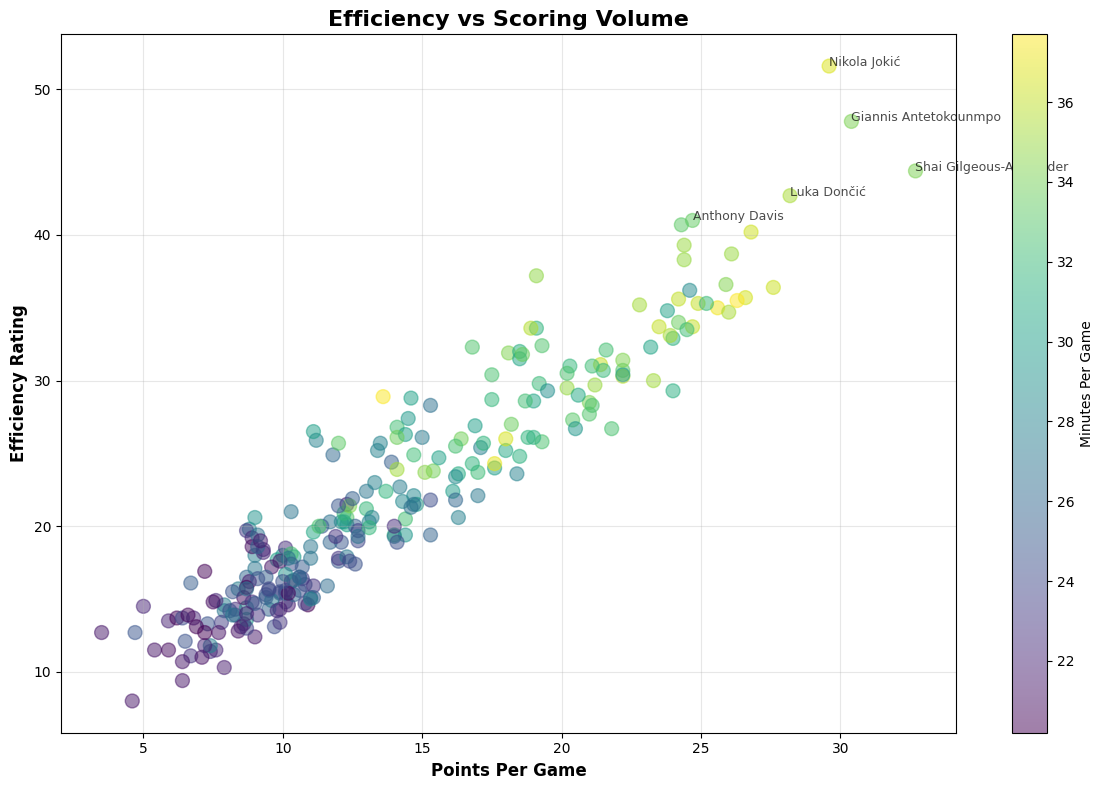

In [14]:
# efficiency vs usage (points)
plt.figure(figsize = (12,8))

plt.scatter(players_df['PTS'], players_df['SIMPLE_EFF'],
            alpha = 0.5, s = 100, c = players_df['MIN'], cmap = 'viridis')

plt.colorbar(label = 'Minutes Per Game')
plt.xlabel('Points Per Game', fontsize = 12, fontweight = 'bold')
plt.ylabel('Efficiency Rating', fontsize = 12, fontweight = 'bold')
plt.title('Efficiency vs Scoring Volume', fontsize = 16, fontweight = 'bold')
plt.grid(alpha = 0.3)

# top 5 players
top_5 = players_df.nlargest(5, 'SIMPLE_EFF')
for _, player in top_5.iterrows():
    plt.annotate(player['PLAYER_NAME'],
                 (player['PTS'], player['SIMPLE_EFF']),
                 fontsize = 9, alpha = 0.7)

plt.tight_layout()
plt.savefig('../visualizations/efficiency_vs_scoring.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
# shooting percentage
players_df['TS_PCT'] = (
    players_df['PTS'] /
    (2 * (players_df['FGA'] + 0.44 * players_df['FTA']))
)

# compare efficiency to ts%
top_simple = players_df.nlargest(10, 'SIMPLE_EFF')['PLAYER_NAME'].tolist()
top_ts = players_df.nlargest(10, 'TS_PCT')['PLAYER_NAME'].tolist()

print("Top 10 by Simple Efficiency:")
print(top_simple)
print("\nTop 10 by True Shooting %:")
print(top_ts)
print(f"\nPlayers in both lists: {set(top_simple) & set(top_ts)}")

Top 10 by Simple Efficiency:
['Nikola Jokić', 'Giannis Antetokounmpo', 'Shai Gilgeous-Alexander', 'Luka Dončić', 'Anthony Davis', 'Victor Wembanyama', 'Jayson Tatum', 'Karl-Anthony Towns', 'Cade Cunningham', 'LeBron James']

Top 10 by True Shooting %:
['Jarrett Allen', 'Daniel Gafford', 'Jalen Duren', 'Dereck Lively II', 'Rudy Gobert', 'Tolu Smith', 'Walker Kessler', 'Christian Braun', 'Nikola Jokić', 'Keon Ellis']

Players in both lists: {'Nikola Jokić'}
